# Metoda Gradientów Sprzężonych #

Metoda gradientów sprzężonych jest algorytmem optymalizacji, który jest szczególnie skuteczny w rozwiązywaniu problemów z dużą liczbą zmiennych. Jest to metoda iteracyjna, która wykorzystuje gradient funkcji celu do kierowania poszukiwaniem minimum.

# Definicja funkcji 

In [340]:
import numpy as np

def conjugateGradientRes(A, b, x0, tol=1e-6, max_iter=100):
    x = x0.copy()
    r = b - A @ x
    p = r.copy()
    rs_old = r.T @ r

    norms = [np.sqrt(rs_old)]

    for _ in range(max_iter):
        Ap = A @ p
        a = rs_old / (p.T @ Ap)
        x = x + a * p
        r = r - a * Ap

        rs_new = r.T @ r
        norm = np.sqrt(rs_new)
        norms.append(norm)
        if norm < tol:
            break

        b = rs_new / rs_old
        p = r + b * p
        rs_old = rs_new

    return x, norms

Funkcja zwraca:
- `x`: przybliżone rozwiązanie układu równań Ax = b po zakończeniu iteracji,
- `norms`: lista norm reszt w kolejnych iteracjach, co pozwala na śledzenie postępu algorytmu.

In [341]:
 def conjugateGradientInfo(A, b, x0, tol=1e-6, max_iter=100):
    x = x0.copy()
    r = b - A @ x
    p = r.copy()
    rs_old = r.T @ r

    calcs = [x.copy()]
    norms = [np.sqrt(rs_old)]

    for _ in range(max_iter):
        Ap = A @ p
        a = rs_old / (p.T @ Ap)
        x = x + a * p
        r = r - a * Ap
        calcs.append(x.copy())

        rs_new = r.T @ r
        norm = np.sqrt(rs_new)
        norms.append(norm)
        if np.sqrt(rs_new) < tol:
            break

        b = rs_new / rs_old
        p = r + b * p
        rs_old = rs_new

    return x, calcs, norms

Funkcja `conjugateGradientInfo` zwraca dodatkowo:
- `calcs`: lista przybliżeń rozwiązania w kolejnych iteracjach, co pozwala na analizę postępu algorytmu.

# Testowanie funkcji

In [342]:
A = np.array([[4, 1], [1, 3]])
b = np.array([1, 2])
x0 = np.zeros(2)
x, norms = conjugateGradientRes(A, b, x0)
print("Rozwiązanie:", x)
print("Normy:", norms)
print("Rozwiązanie numpy: ", np.linalg.solve(A, b))

Rozwiązanie: [0.09090909 0.63636364]
Normy: [np.float64(2.23606797749979), np.float64(0.5590169943749475), np.float64(0.0)]
Rozwiązanie numpy:  [0.09090909 0.63636364]


In [343]:
A= np.array([[4, 1, 0], [1, 3, 1], [0, 1, 2]])
b = np.array([1, 2, 3])
x0 = np.zeros(3)
x, norms = conjugateGradientRes(A, b, x0)
print("Rozwiązanie:", x)
print("Normy:", norms)
print("Rozwiązanie numpy: ", np.linalg.solve(A, b))

Rozwiązanie: [0.22222222 0.11111111 1.44444444]
Normy: [np.float64(3.7416573867739413), np.float64(1.2961481396815722), np.float64(0.5862325810233123), np.float64(2.044325800678625e-16)]
Rozwiązanie numpy:  [0.22222222 0.11111111 1.44444444]


In [344]:
A= np.array([[4, 1, 0, 0], [1, 3, 1, 0], [0, 1, 2, 1], [0, 0, 1, 1]])
b = np.array([1, 2, 3, 4])
x0 = np.zeros(4)
x, norms = conjugateGradientRes(A, b, x0)
print("Rozwiązanie:", x)
print("Normy:", norms)
print("Rozwiązanie numpy: ", np.linalg.solve(A, b))

Rozwiązanie: [-0.14285714  1.57142857 -2.57142857  6.57142857]
Normy: [np.float64(5.477225575051661), np.float64(2.560381915956203), np.float64(2.161967319864575), np.float64(2.074726956173158), np.float64(7.451985202650987e-16)]
Rozwiązanie numpy:  [-0.14285714  1.57142857 -2.57142857  6.57142857]


In [345]:
A = np.array([[6, 3, 3], [3, 5, 2], [3, 2, 4]])
b = np.array([3.0 ,2.0 , 4.0] )
x0 = np.zeros(3)
x, norms = conjugateGradientRes(A, b, x0)
print("Rozwiązanie:", x)
print("Normy:", norms)
print("Rozwiązanie numpy: ", np.linalg.solve(A, b))

Rozwiązanie: [1.52655666e-16 8.32667268e-17 1.00000000e+00]
Normy: [np.float64(5.385164807134504), np.float64(1.4790691555838889), np.float64(0.2703009951869958), np.float64(2.5766758230879797e-15)]
Rozwiązanie numpy:  [1.32169408e-16 3.17206578e-17 1.00000000e+00]


In [346]:
A = np.array([[4, 1, 0, 0, 0], [1, 3, 1, 0, 0], [0, 1, 2, 1, 0], [0, 0, 1, 1, 1], [0, 0, 0, 1, 2]])
b = np.array([1, 2, 3, 4, 5])
x0 = np.zeros(5)
x, norms = conjugateGradientRes(A, b, x0)
print("Rozwiązanie:", x)
print("Normy:", norms)
print("Rozwiązanie numpy: ", np.linalg.solve(A, b))

Rozwiązanie: [ 0.25  0.    1.75 -0.5   2.75]
Normy: [np.float64(7.416198487095663), np.float64(1.6987649834911838), np.float64(0.39184924481559075), np.float64(0.20110582312623798), np.float64(0.505121946459218), np.float64(3.4042470906738416e-15)]
Rozwiązanie numpy:  [ 2.50000000e-01  3.22973971e-16  1.75000000e+00 -5.00000000e-01
  2.75000000e+00]


Na podstawie powyższych przykładów widać, że metoda gradientów sprzężonych skutecznie znajduje rozwiązania układów równań liniowych, a normy reszt maleją w kolejnych iteracjach, co wskazuje na zbieżność algorytmu.

# Sprawdzenie ilosci iteracji i normy residuum w zależności od wielkości macierzy

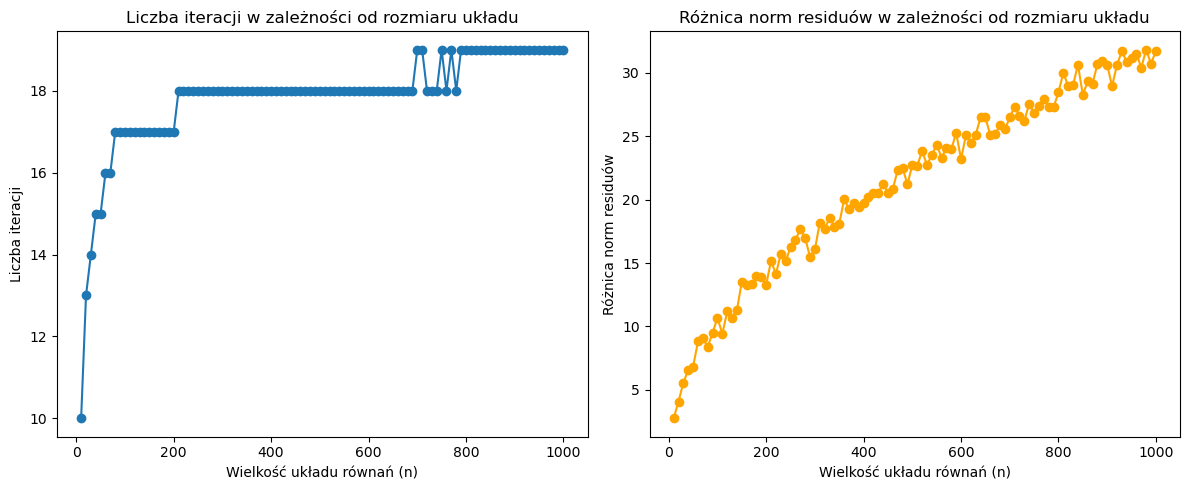

In [347]:
import numpy as np
import matplotlib.pyplot as plt

sizes = range(10, 1001, 10)
iterations = []
norm_diffs = []

for n in sizes:
    M = np.random.randn(n, n)
    A = M.T @ M + n * np.eye(n)  
    
    b = np.random.randn(n)
    x0 = np.zeros(n)

    x, calcs, norms = conjugateGradientInfo(A, b, x0)

    iterations.append(len(norms) - 1)  
    norm_diffs.append(norms[0] - norms[-1])  

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(list(sizes), iterations, marker='o')
plt.xlabel('Wielkość układu równań (n)')
plt.ylabel('Liczba iteracji')
plt.title('Liczba iteracji w zależności od rozmiaru układu')

plt.subplot(1, 2, 2)
plt.plot(list(sizes), norm_diffs, marker='o', color='orange')
plt.xlabel('Wielkość układu równań (n)')
plt.ylabel('Różnica norm residuów')
plt.title('Różnica norm residuów w zależności od rozmiaru układu')

plt.tight_layout()
plt.show()

# Wnioski:
- Liczba iteracji rośnie wraz z rozmiarem macierzy, co jest zgodne z oczekiwaniami, ponieważ większe macierze wymagają więcej obliczeń.
- Jednak wzrost ilości iteracji nie jest liniowy, co sugeruje, że metoda gradientów sprzężonych jest efektywna nawet dla dużych układów równań.
- Wykres ilosci iteracji zaczyna przypominać logarytmiczny, co sugeruje, że metoda staje się coraz bardziej efektywna w miarę wzrostu rozmiaru macierzy.
- Różnica norm residuów rośnie wraz z rozmiarem macierzy, co wskazuje na to, że metoda jest w stanie skutecznie redukować błąd w miarę kolejnych iteracji.
- 

# Wizualizacja postępu algorytmu dla macierzy 2x2

In [348]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML
from datetime import datetime

def run_conjugate_gradient_animation(A, b, x0=None, tol=1e-8, max_iter=None):
    if x0 is None:
        x0 = np.zeros_like(b)
    if max_iter is None:
        max_iter = len(b)

    animations_dir = "animations"
    os.makedirs(animations_dir, exist_ok=True)

    x_final, calcs, norms = conjugateGradientInfo(A, b, x0, tol=tol, max_iter=max_iter)

    xs = [c[0] for c in calcs]
    ys = [c[1] for c in calcs]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.set_title("Trajektoria")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.plot(xs, ys, linestyle='--', label='Ścieżka')
    point, = ax1.plot([], [], marker='o')

    ax2.set_title("Norma residuum")
    ax2.set_xlabel("Iteracja")
    ax2.set_ylabel("||r||")
    ax2.set_yscale('log')
    ax2.plot(norms, linestyle='--', label='Zbieżność')
    norm_point, = ax2.plot([], [], marker='o')

    def init():
        point.set_data([], [])
        norm_point.set_data([], [])
        return point, norm_point

    def update(frame):
        point.set_data([xs[frame]], [ys[frame]])
        norm_point.set_data([frame], [norms[frame]])
        return point, norm_point

    ani = FuncAnimation(fig, update, frames=len(calcs), init_func=init, blit=True, repeat=False)

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    shape_str = f"{A.shape[0]}x{A.shape[1]}"
    gif_filename = f"trajectory_{shape_str}_tol{tol:.0e}_{timestamp}.gif"
    gif_path = os.path.join(animations_dir, gif_filename)
    ani.save(gif_path, writer=PillowWriter(fps=2))
    plt.close(fig)

    display(HTML(f"<img src='{gif_path}' alt='Animacja trajektorii'>"))

    return x_final

# Opisanie wykresów
- Wykresy przedstawiają trajektorię rozwiązania w przestrzeni 2D oraz zbieżność normy residuum w kolejnych iteracjach.
- Wykres trajektorii pokazuje, jak rozwiązanie zmienia się w przestrzeni, a wykres zbieżności normy residuum ilustruje, jak szybko algorytm zbiega do rozwiązania.


In [349]:
A= np.array([[4, 1], [1, 3]])
b = np.array([1, 2])
x0 = np.zeros(2)
run_conjugate_gradient_animation(A, b, x0);

In [350]:
A= np.array([[0, 55 ] , [ 7,99]])
b = np.array([4, 3])
x0 = np.ones(2)
run_conjugate_gradient_animation(A, b, x0);

# Wizualizacja postępu algorytmu dla macierzy 3x3

In [351]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML, display
import datetime  

def run_conjugate_gradient_animation_3d(A, b, x0=None, tol=1e-8, max_iter=None):
    if x0 is None:
        x0 = np.zeros_like(b)
    if max_iter is None:
        max_iter = len(b)

    animations_dir = "animations"
    os.makedirs(animations_dir, exist_ok=True)

    x_final, calcs, norms = conjugateGradientInfo(A, b, x0, tol=tol, max_iter=max_iter)

    xs = [c[0] for c in calcs]
    ys = [c[1] for c in calcs]
    zs = [c[2] for c in calcs]

    fig = plt.figure(figsize=(12, 5))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax2 = fig.add_subplot(1, 2, 2)

    ax1.set_title("Trajektoria w 3D")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_zlabel("z")
    ax1.plot(xs, ys, zs, linestyle='--', label='Ścieżka')
    point, = ax1.plot([], [], [], marker='o', color='red', label='Aktualna pozycja')

    ax2.set_title("Norma residuum")
    ax2.set_xlabel("Iteracja")
    ax2.set_ylabel("||r||")
    ax2.set_yscale('log')
    ax2.plot(norms, linestyle='--', label='Zbieżność')
    norm_point, = ax2.plot([], [], marker='o', color='red')

    def init():
        point.set_data([], [])
        point.set_3d_properties([])
        norm_point.set_data([], [])
        return point, norm_point

    def update(frame):
        point.set_data([xs[frame]], [ys[frame]])
        point.set_3d_properties([zs[frame]])
        norm_point.set_data([frame], [norms[frame]])
        return point, norm_point

    ani = FuncAnimation(fig, update, frames=len(calcs), init_func=init, blit=True, repeat=False)

    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    shape_str = f"{A.shape[0]}x{A.shape[1]}"
    gif_filename = f"trajectory3D_{shape_str}_tol{tol:.0e}_{timestamp}.gif"
    gif_path = os.path.join(animations_dir, gif_filename)
    ani.save(gif_path, writer=PillowWriter(fps=2))
    plt.close(fig)

    display(HTML(f"<img src='{gif_path}' alt='Animacja trajektorii 3D'>"))

    print("Wektor początkowy x0:")
    print(np.array2string(x0, precision=6, floatmode='fixed'))
    print("\nWyniki iteracji:")

    for i, (x_iter, norm) in enumerate(zip(calcs, norms)):
        print(f"Iteracja {i}:")
        print(f"x = {np.array2string(np.array(x_iter), precision=6, floatmode='fixed')}")
        print(f"Norma residuum ||r|| = {norm:.3e}\n")

    print(f"Końcowy wynik po {len(calcs)-1} iteracjach:")
    print(np.array2string(x_final, precision=6, floatmode='fixed'))

    return x_final


In [352]:
A = np.array([[4, 1, 0], [1, 3, 1], [0, 1, 2]])
b = np.array([1, 2, 3])
x0 = np.zeros(3)
run_conjugate_gradient_animation_3d(A, b, x0);

Wektor początkowy x0:
[0.000000 0.000000 0.000000]

Wyniki iteracji:
Iteracja 0:
x = [0.000000 0.000000 0.000000]
Norma residuum ||r|| = 3.742e+00

Iteracja 1:
x = [0.280000 0.560000 0.840000]
Norma residuum ||r|| = 1.296e+00

Iteracja 2:
x = [0.049231 0.329231 1.301538]
Norma residuum ||r|| = 5.862e-01

Iteracja 3:
x = [0.222222 0.111111 1.444444]
Norma residuum ||r|| = 2.044e-16

Końcowy wynik po 3 iteracjach:
[0.222222 0.111111 1.444444]


In [353]:
A = np.array([[6, 3, 3], [3, 5, 2], [3, 2, 4]])
b = np.array([5, 2, 3])
x0 = np.zeros(3)
run_conjugate_gradient_animation_3d(A, b, x0);

Wektor początkowy x0:
[0.000000 0.000000 0.000000]

Wyniki iteracji:
Iteracja 0:
x = [0.000000 0.000000 0.000000]
Norma residuum ||r|| = 6.164e+00

Iteracja 1:
x = [0.500000 0.200000 0.300000]
Norma residuum ||r|| = 1.212e+00

Iteracja 2:
x = [ 0.763983 -0.189312  0.306111]
Norma residuum ||r|| = 1.584e-01

Iteracja 3:
x = [ 0.803922 -0.176471  0.235294]
Norma residuum ||r|| = 1.102e-15

Końcowy wynik po 3 iteracjach:
[ 0.803922 -0.176471  0.235294]


# Animacja 3D trajektorii rozwiązania da macierzy 3x3 z różnymi wektorami początkowymi #

In [354]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML, display
import datetime  

def run_conjugate_gradient_animation_3d_multiple_starts(A, b, x0_list=None, tol=1e-8, max_iter=None):
    if x0_list is None:
        x0_list = [np.zeros_like(b), np.ones_like(b), np.array([1,0,1])]
    if max_iter is None:
        max_iter = len(b)

    animations_dir = "animations"
    os.makedirs(animations_dir, exist_ok=True)

    colors = ['red', 'green', 'blue']
    labels = ['x0 = [0,0,0]', 'x0 = [1,1,1]', 'x0 = [1,0,1]']

    results = []
    for x0 in x0_list:
        x_final, calcs, norms = conjugateGradientInfo(A, b, x0, tol=tol, max_iter=max_iter)
        results.append((x_final, calcs, norms))

    fig = plt.figure(figsize=(12, 5))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax2 = fig.add_subplot(1, 2, 2)

    ax1.set_title("Trajektoria w 3D - różne x0")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_zlabel("z")

    ax2.set_title("Norma residuum - różne x0")
    ax2.set_xlabel("Iteracja")
    ax2.set_ylabel("||r||")
    ax2.set_yscale('log')

    points = []
    norm_points = []
    max_frames = max(len(r[1]) for r in results)  

    for color, label, (x_final, calcs, norms) in zip(colors, labels, results):
        xs = [c[0] for c in calcs]
        ys = [c[1] for c in calcs]
        zs = [c[2] for c in calcs]

        ax1.plot(xs, ys, zs, linestyle='--', color=color, label=label)
        p, = ax1.plot([], [], [], marker='o', color=color)
        points.append(p)

        ax2.plot(norms, linestyle='--', color=color, label=label)
        np_point, = ax2.plot([], [], marker='o', color=color)
        norm_points.append(np_point)

    ax1.legend()
    ax2.legend()

    def init():
        for p, np_point in zip(points, norm_points):
            p.set_data([], [])
            p.set_3d_properties([])
            np_point.set_data([], [])
        return points + norm_points

    def update(frame):
        for i, (p, np_point, (x_final, calcs, norms)) in enumerate(zip(points, norm_points, results)):
            if frame < len(calcs):
                xs, ys, zs = calcs[frame]
                p.set_data([xs], [ys])
                p.set_3d_properties([zs])
                np_point.set_data([frame], [norms[frame]])
            else:
                xs, ys, zs = calcs[-1]
                p.set_data([xs], [ys])
                p.set_3d_properties([zs])
                np_point.set_data([len(calcs)-1], [norms[-1]])
        return points + norm_points

    ani = FuncAnimation(fig, update, frames=max_frames, init_func=init, blit=True, repeat=False)

    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    shape_str = f"{A.shape[0]}x{A.shape[1]}"
    gif_filename = f"trajectory3D_multiple_starts_{shape_str}_tol{tol:.0e}_{timestamp}.gif"
    gif_path = os.path.join(animations_dir, gif_filename)
    ani.save(gif_path, writer=PillowWriter(fps=2))
    plt.close(fig)

    display(HTML(f"<img src='{gif_path}' alt='Animacja trajektorii 3D'>"))

    for i, (x0, (x_final, calcs, norms)) in enumerate(zip(x0_list, results)):
        print(f"\nWektor początkowy x0 ({labels[i]}):")
        print(np.array2string(x0, precision=6, floatmode='fixed'))
        print("\nWyniki iteracji:")
        for j, (x_iter, norm) in enumerate(zip(calcs, norms)):
            print(f"Iteracja {j}:")
            print(f"x = {np.array2string(np.array(x_iter), precision=6, floatmode='fixed')}")
            print(f"Norma residuum ||r|| = {norm:.3e}\n")
        print(f"Końcowy wynik po {len(calcs)-1} iteracjach:")
        print(np.array2string(x_final, precision=6, floatmode='fixed'))

    return [r[0] for r in results]


In [355]:
A = np.array([[4, 1, 0], [1, 3, 1], [0, 1, 2]])
b = np.array([1, 2, 3])
x0_list = [np.zeros(3), np.ones(3), np.array([1, 0, 1])]
run_conjugate_gradient_animation_3d_multiple_starts(A, b, x0_list)


Wektor początkowy x0 (x0 = [0,0,0]):
[0.000000 0.000000 0.000000]

Wyniki iteracji:
Iteracja 0:
x = [0.000000 0.000000 0.000000]
Norma residuum ||r|| = 3.742e+00

Iteracja 1:
x = [0.280000 0.560000 0.840000]
Norma residuum ||r|| = 1.296e+00

Iteracja 2:
x = [0.049231 0.329231 1.301538]
Norma residuum ||r|| = 5.862e-01

Iteracja 3:
x = [0.222222 0.111111 1.444444]
Norma residuum ||r|| = 2.044e-16

Końcowy wynik po 3 iteracjach:
[0.222222 0.111111 1.444444]

Wektor początkowy x0 (x0 = [1,1,1]):
[1.000000 1.000000 1.000000]

Wyniki iteracji:
Iteracja 0:
x = [1.000000 1.000000 1.000000]
Norma residuum ||r|| = 5.000e+00

Iteracja 1:
x = [0.130435 0.347826 1.000000]
Norma residuum ||r|| = 6.875e-01

Iteracja 2:
x = [0.167651 0.191263 1.442739]
Norma residuum ||r|| = 2.427e-01

Iteracja 3:
x = [0.222222 0.111111 1.444444]
Norma residuum ||r|| = 2.578e-16

Końcowy wynik po 3 iteracjach:
[0.222222 0.111111 1.444444]

Wektor początkowy x0 (x0 = [1,0,1]):
[1 0 1]

Wyniki iteracji:
Iteracja 0:
x 

[array([0.22222222, 0.11111111, 1.44444444]),
 array([0.22222222, 0.11111111, 1.44444444]),
 array([0.22222222, 0.11111111, 1.44444444])]

# Macierze 3x3  #
- diagonalna macierz 3x3,
- dobrze uwarunkowana macierz 3x3 (np. macierz bliska jednostkowej),
- macierz bliska osobliwej 3x3 (wyznacznik bliski 0),
- symetryczna macierz 3x3,
- diagonalna macierz 3x3 o dużym rozrzucie wartości,
- macierz jednostkowa 3x3.
- macierz Laplasjana 3x3 

In [356]:
def get_matrices_with_descriptions():
    matrices = {}

    diag = np.diag([1.0, 2.0, 3.0])
    matrices['Diagonalna'] = diag

    well_conditioned = np.array([
        [1, 0.1, 0],
        [0.1, 1, 0.1],
        [0, 0.1, 1]
    ], dtype=float)
    matrices['Dobrze uwarunkowana'] = well_conditioned

    close_to_singular = np.array([
        [1, 1, 1],
        [1, 1.01, 1],
        [1, 1, 1.02]
    ], dtype=float)
    matrices['Bliska osobliwej'] = close_to_singular

    symmetric = np.array([
        [2, -1, 0],
        [-1, 2, -1],
        [0, -1, 2]
    ], dtype=float)
    matrices['Symetryczna'] = symmetric

    diag_wide_range = np.diag([1.0, 10.0, 100.0])
    matrices['Diagonalna z dużym rozrzutem wartości'] = diag_wide_range

    identity = np.eye(3, dtype=float)
    matrices['Jednostkowa'] = identity

    laplacian = np.array([
        [1, -1, 0],
        [-1, 2, -1],
        [0, -1, 1]
    ], dtype=float)
    matrices['Macierz Laplasjana'] = laplacian

    return matrices

In [357]:
matrices = get_matrices_with_descriptions()
for description, matrix in matrices.items():
    b = np.array([3,2,4], dtype=float) 
    x0_list = [np.zeros(3 ,dtype=float), np.ones(3,dtype=float), np.array([1, 0, 1], dtype=float)] 
    print(f"Macierz: {description}")
    run_conjugate_gradient_animation_3d_multiple_starts(matrix, b, x0_list)

Macierz: Diagonalna



Wektor początkowy x0 (x0 = [0,0,0]):
[0.000000 0.000000 0.000000]

Wyniki iteracji:
Iteracja 0:
x = [0.000000 0.000000 0.000000]
Norma residuum ||r|| = 5.385e+00

Iteracja 1:
x = [1.338462 0.892308 1.784615]
Norma residuum ||r|| = 2.154e+00

Iteracja 2:
x = [2.824176 1.263736 1.289377]
Norma residuum ||r|| = 5.714e-01

Iteracja 3:
x = [3.000000 1.000000 1.333333]
Norma residuum ||r|| = 1.495e-16

Końcowy wynik po 3 iteracjach:
[3.000000 1.000000 1.333333]

Wektor początkowy x0 (x0 = [1,1,1]):
[1.000000 1.000000 1.000000]

Wyniki iteracji:
Iteracja 0:
x = [1.000000 1.000000 1.000000]
Norma residuum ||r|| = 2.236e+00

Iteracja 1:
x = [2.428571 1.000000 1.714286]
Norma residuum ||r|| = 1.278e+00

Iteracja 2:
x = [3.000000 1.000000 1.333333]
Norma residuum ||r|| = 0.000e+00

Końcowy wynik po 2 iteracjach:
[3.000000 1.000000 1.333333]

Wektor początkowy x0 (x0 = [1,0,1]):
[1.000000 0.000000 1.000000]

Wyniki iteracji:
Iteracja 0:
x = [1.000000 0.000000 1.000000]
Norma residuum ||r|| = 3.00


Wektor początkowy x0 (x0 = [0,0,0]):
[0.000000 0.000000 0.000000]

Wyniki iteracji:
Iteracja 0:
x = [0.000000 0.000000 0.000000]
Norma residuum ||r|| = 5.385e+00

Iteracja 1:
x = [2.735849 1.823899 3.647799]
Norma residuum ||r|| = 4.992e-01

Iteracja 2:
x = [2.855706 1.327852 3.875367]
Norma residuum ||r|| = 1.414e-02

Iteracja 3:
x = [2.867347 1.326531 3.867347]
Norma residuum ||r|| = 1.763e-17

Końcowy wynik po 3 iteracjach:
[2.867347 1.326531 3.867347]

Wektor początkowy x0 (x0 = [1,1,1]):
[1.000000 1.000000 1.000000]

Wyniki iteracji:
Iteracja 0:
x = [1.000000 1.000000 1.000000]
Norma residuum ||r|| = 3.558e+00

Iteracja 1:
x = [2.791332 1.754245 3.734138]
Norma residuum ||r|| = 4.180e-01

Iteracja 2:
x = [2.855433 1.327691 3.874764]
Norma residuum ||r|| = 1.402e-02

Iteracja 3:
x = [2.867347 1.326531 3.867347]
Norma residuum ||r|| = 9.591e-18

Końcowy wynik po 3 iteracjach:
[2.867347 1.326531 3.867347]

Wektor początkowy x0 (x0 = [1,0,1]):
[1.000000 0.000000 1.000000]

Wyniki ite


Wektor początkowy x0 (x0 = [0,0,0]):
[0.000000 0.000000 0.000000]

Wyniki iteracji:
Iteracja 0:
x = [0.000000 0.000000 0.000000]
Norma residuum ||r|| = 5.385e+00

Iteracja 1:
x = [1.069322 0.712881 1.425762]
Norma residuum ||r|| = 1.450e+00

Iteracja 2:
x = [  1.665354 -66.056121  67.162778]
Norma residuum ||r|| = 2.787e-01

Iteracja 3:
x = [  53.000000 -100.000000   50.000000]
Norma residuum ||r|| = 9.476e-12

Końcowy wynik po 3 iteracjach:
[  53.000000 -100.000000   50.000000]

Wektor początkowy x0 (x0 = [1,1,1]):
[1.000000 1.000000 1.000000]

Wyniki iteracji:
Iteracja 0:
x = [1.000000 1.000000 1.000000]
Norma residuum ||r|| = 1.407e+00

Iteracja 1:
x = [  1.000000 -64.997064  65.036755]
Norma residuum ||r|| = 3.032e+00

Iteracja 2:
x = [  1.672637 -66.052650  67.166553]
Norma residuum ||r|| = 2.798e-01

Iteracja 3:
x = [  53.000000 -100.000000   50.000000]
Norma residuum ||r|| = 2.902e-13

Końcowy wynik po 3 iteracjach:
[  53.000000 -100.000000   50.000000]

Wektor początkowy x0 (x


Wektor początkowy x0 (x0 = [0,0,0]):
[0.000000 0.000000 0.000000]

Wyniki iteracji:
Iteracja 0:
x = [0.000000 0.000000 0.000000]
Norma residuum ||r|| = 5.385e+00

Iteracja 1:
x = [2.900000 1.933333 3.866667]
Norma residuum ||r|| = 5.292e+00

Iteracja 2:
x = [3.949396 5.464635 4.932720]
Norma residuum ||r|| = 6.950e-01

Iteracja 3:
x = [4.250000 5.500000 4.750000]
Norma residuum ||r|| = 9.845e-16

Końcowy wynik po 3 iteracjach:
[4.250000 5.500000 4.750000]

Wektor początkowy x0 (x0 = [1,1,1]):
[1.000000 1.000000 1.000000]

Wyniki iteracji:
Iteracja 0:
x = [1.000000 1.000000 1.000000]
Norma residuum ||r|| = 4.123e+00

Iteracja 1:
x = [3.428571 3.428571 4.642857]
Norma residuum ||r|| = 3.737e+00

Iteracja 2:
x = [3.939683 5.473016 4.898413]
Norma residuum ||r|| = 6.848e-01

Iteracja 3:
x = [4.250000 5.500000 4.750000]
Norma residuum ||r|| = 6.335e-16

Końcowy wynik po 3 iteracjach:
[4.250000 5.500000 4.750000]

Wektor początkowy x0 (x0 = [1,0,1]):
[1.000000 0.000000 1.000000]

Wyniki ite


Wektor początkowy x0 (x0 = [0,0,0]):
[0.000000 0.000000 0.000000]

Wyniki iteracji:
Iteracja 0:
x = [0.000000 0.000000 0.000000]
Norma residuum ||r|| = 5.385e+00

Iteracja 1:
x = [0.052759 0.035173 0.070346]
Norma residuum ||r|| = 4.540e+00

Iteracja 2:
x = [0.899091 0.546650 0.038424]
Norma residuum ||r|| = 4.057e+00

Iteracja 3:
x = [3.000000 0.200000 0.040000]
Norma residuum ||r|| = 2.844e-13

Końcowy wynik po 3 iteracjach:
[3.000000 0.200000 0.040000]

Wektor początkowy x0 (x0 = [1,1,1]):
[1.000000 1.000000 1.000000]

Wyniki iteracji:
Iteracja 0:
x = [1.000000 1.000000 1.000000]
Norma residuum ||r|| = 9.635e+01

Iteracja 1:
x = [1.020134 0.919466 0.033592]
Norma residuum ||r|| = 7.490e+00

Iteracja 2:
x = [1.231375 0.151363 0.040037]
Norma residuum ||r|| = 1.834e+00

Iteracja 3:
x = [3.000000 0.200000 0.040000]
Norma residuum ||r|| = 8.736e-12

Końcowy wynik po 3 iteracjach:
[3.000000 0.200000 0.040000]

Wektor początkowy x0 (x0 = [1,0,1]):
[1.000000 0.000000 1.000000]

Wyniki ite


Wektor początkowy x0 (x0 = [0,0,0]):
[0.000000 0.000000 0.000000]

Wyniki iteracji:
Iteracja 0:
x = [0.000000 0.000000 0.000000]
Norma residuum ||r|| = 5.385e+00

Iteracja 1:
x = [3.000000 2.000000 4.000000]
Norma residuum ||r|| = 0.000e+00

Końcowy wynik po 1 iteracjach:
[3.000000 2.000000 4.000000]

Wektor początkowy x0 (x0 = [1,1,1]):
[1.000000 1.000000 1.000000]

Wyniki iteracji:
Iteracja 0:
x = [1.000000 1.000000 1.000000]
Norma residuum ||r|| = 3.742e+00

Iteracja 1:
x = [3.000000 2.000000 4.000000]
Norma residuum ||r|| = 0.000e+00

Końcowy wynik po 1 iteracjach:
[3.000000 2.000000 4.000000]

Wektor początkowy x0 (x0 = [1,0,1]):
[1.000000 0.000000 1.000000]

Wyniki iteracji:
Iteracja 0:
x = [1.000000 0.000000 1.000000]
Norma residuum ||r|| = 4.123e+00

Iteracja 1:
x = [3.000000 2.000000 4.000000]
Norma residuum ||r|| = 0.000e+00

Końcowy wynik po 1 iteracjach:
[3.000000 2.000000 4.000000]
Macierz: Macierz Laplasjana



Wektor początkowy x0 (x0 = [0,0,0]):
[0.000000 0.000000 0.000000]

Wyniki iteracji:
Iteracja 0:
x = [0.000000 0.000000 0.000000]
Norma residuum ||r|| = 5.385e+00

Iteracja 1:
x = [17.400000 11.600000 23.200000]
Norma residuum ||r|| = 2.102e+01

Iteracja 2:
x = [330.666667 375.666667 412.666667]
Norma residuum ||r|| = 5.856e+01

Iteracja 3:
x = [5.054080e+31 5.054080e+31 5.054080e+31]
Norma residuum ||r|| = 3.694e+16

Końcowy wynik po 3 iteracjach:
[5.054080e+31 5.054080e+31 5.054080e+31]

Wektor początkowy x0 (x0 = [1,1,1]):
[1.000000 1.000000 1.000000]

Wyniki iteracji:
Iteracja 0:
x = [1.000000 1.000000 1.000000]
Norma residuum ||r|| = 5.385e+00

Iteracja 1:
x = [18.400000 12.600000 24.200000]
Norma residuum ||r|| = 2.102e+01

Iteracja 2:
x = [331.666667 376.666667 413.666667]
Norma residuum ||r|| = 5.856e+01

Iteracja 3:
x = [5.054080e+31 5.054080e+31 5.054080e+31]
Norma residuum ||r|| = 3.694e+16

Końcowy wynik po 3 iteracjach:
[5.054080e+31 5.054080e+31 5.054080e+31]

Wektor pocz

# Wnioski z analizy metody gradientów sprzężonych (CG)

## 1. Macierz diagonalna oraz dobrze uwarunkowana, symetryczna i diagonalna z dużym rozrzutem wartości
- Metoda CG bardzo szybko się zbiega.
- Wybór punktu startowego x0 nie ma dużego znaczenia – rozwiązanie osiągane jest szybko niezależnie od niego.
- W przypadku macierzy diagonalnej dla x0=[0,0,0] początkowo zbieżność może być wolna, ale szybko nadrabia.

## 2. Macierz bliska osobliwej
- Metoda CG najlepiej zachowuje się, gdy punkt początkowy to x0 = [1, 1, 1].
- Słaba kondycja macierzy może powodować problemy z dokładnością lub stabilnością metody, zależnie od x0 .

## 3. Macierz laplasjańska
- Zaobserwowano wzrost normy residuum w trakcie działania algorytmu.
- Może to świadczyć o trudnościach z konwergencją CG dla takich macierzy, zwłaszcza w większych wymiarach.
- Macierze laplasjańskie charakteryzują się strukturą powodującą wolniejszą konwergencję.

## 4. Macierz jednostkowa
- Zbieżność jest natychmiastowa – norma residuum jest bardzo mała już od pierwszej iteracji.
- Wystarczają bardzo nieliczne iteracje, by osiągnąć wysoką dokładność rozwiązania.
- Jest to przypadek idealny dla CG – macierz jest doskonale uwarunkowana.

## 5. Ogólne obserwacje
- Skuteczność metody gradientów sprzężonych silnie zależy od kondycji macierzy.
- Dobrze uwarunkowane, symetryczne i dodatnio określone macierze zapewniają szybkie i stabilne działanie algorytmu.
- Wybór punktu początkowego x0 może wpływać na szybkość zbieżności, ale jego znaczenie maleje dla dobrze uwarunkowanych macierzy.
- Macierze bliskie osobliwości lub o specjalnej strukturze (np. laplasjańskie) mogą powodować problemy konwergencyjne.

---

### **Wniosek końcowy:**
Metoda gradientów sprzężonych (CG) jest bardzo efektywna dla dobrze uwarunkowanych, symetrycznych i dodatnio określonych macierzy. Problemy mogą pojawiać się przy macierzach słabo uwarunkowanych lub osobliwych, gdzie konwergencja jest wolna lub niestabilna. Dobór punktu początkowego ma wpływ głównie w przypadkach trudniejszych, ale dla dobrze postawionych układów jego znaczenie jest znikome.



# Porównanie Metdoy Gradientów Sprzężonych z Gauss-Seidel i metoda Gradientu Prostego

In [358]:
import numpy as np

def gaussSeidelInfo(A, b, x0, tol=1e-6, max_iter=100):
    x = x0.copy()
    n = len(b)

    calcs = [x.copy()]
    norms = [np.linalg.norm(b - A @ x)]

    for _ in range(max_iter):
        x_new = x.copy()
        for i in range(n):
            sum1 = np.dot(A[i, :i], x_new[:i])
            sum2 = np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (b[i] - sum1 - sum2) / A[i, i]

        res_norm = np.linalg.norm(b - A @ x_new)
        calcs.append(x_new.copy())
        norms.append(res_norm)

        if res_norm < tol:
            break

        x = x_new

    return x, calcs, norms


In [359]:
def gradientDescentInfo(A, b, x0, tol=1e-6, max_iter=100, alpha=1e-3):
    x = x0.copy()
    r = b - A @ x

    calcs = [x.copy()]
    norms = [np.linalg.norm(r)]

    for _ in range(max_iter):
        grad = -r
        x = x - alpha * grad
        r = b - A @ x

        calcs.append(x.copy())
        norms.append(np.linalg.norm(r))

        if np.linalg.norm(r) < tol:
            break

    return x, calcs, norms


In [360]:
A = np.array([[4, 1], [1, 3]])
b = np.array([1, 2])
x0 = np.zeros(2)

x_cg, calcs_cg, norms_cg = conjugateGradientInfo(A, b, x0)
x_gs, calcs_gs, norms_gs = gaussSeidelInfo(A, b, x0)
x_gd, calcs_gd, norms_gd = gradientDescentInfo(A, b, x0)


print("Metoda Gradientów Sprzężonych:")
print("Rozwiązanie:", x_cg)
print("\nMetoda Gauss-Seidel:")
print("Rozwiązanie:", x_gs)
print("\nMetoda Gradientu Prostego:")
print("Rozwiązanie:", x_gd)
# i numpy
print("Rozwiązanie numpy:", np.linalg.solve(A, b))


Metoda Gradientów Sprzężonych:
Rozwiązanie: [0.09090909 0.63636364]

Metoda Gauss-Seidel:
Rozwiązanie: [0.09090973 0.63636342]

Metoda Gradientu Prostego:
Rozwiązanie: [0.07477074 0.16931094]
Rozwiązanie numpy: [0.09090909 0.63636364]


### W metodzie gradientu prostego parametr alpha (krok) ma duży wpływ na zbieżność. W praktyce może być potrzebne dobranie go dynamicznie (np. przez line search) lub dostosowanie ręczne. ###


# Porównanie metod

- Metoda Gradientów Sprzężonych
- Gauss-Seidel
- Metoda Gradientu Prostego

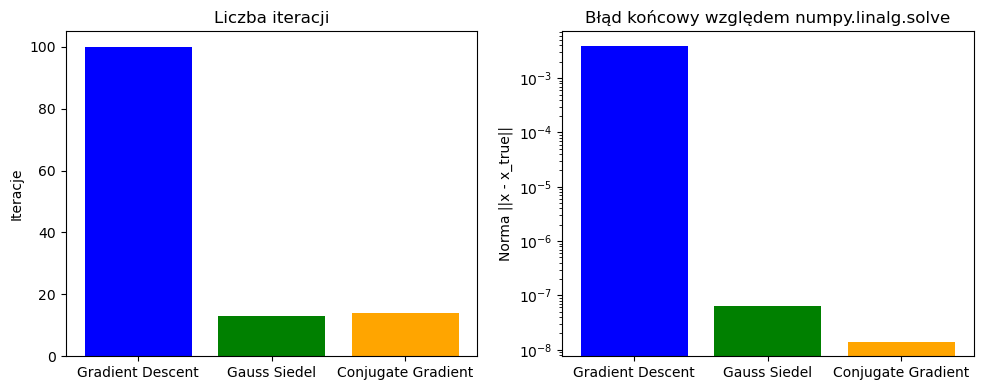

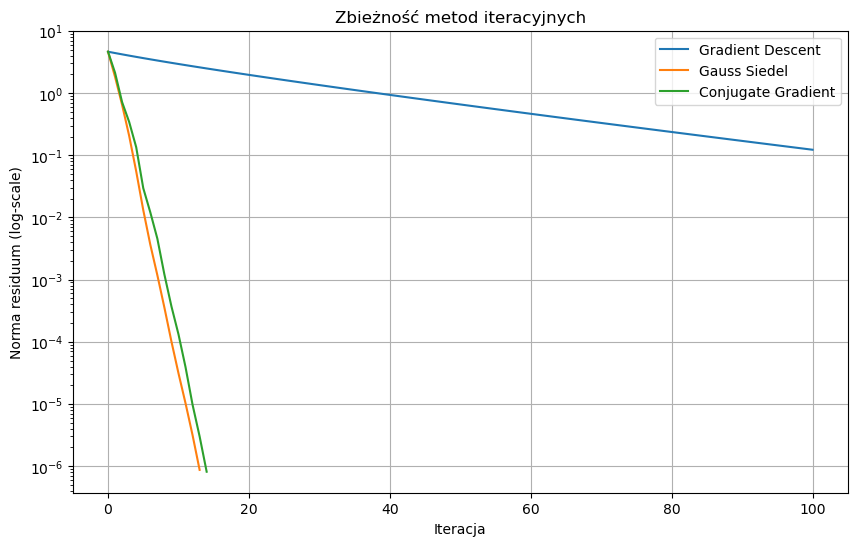

In [361]:
import numpy as np
import matplotlib.pyplot as plt

def generate_pos_def_matrix(n):
    A = np.random.randn(n, n)
    A = A.T @ A + n * np.eye(n)  
    return A


def run_comparison(n=100):
    A = generate_pos_def_matrix(n)
    b = np.random.randn(n)
    x0 = np.zeros_like(b)
    x_true = np.linalg.solve(A, b)

    x_gd, calcs_gd, err_gd = gradientDescentInfo(A, b, x0)
    x_ngd, calcs_ngd, err_ngd = gaussSeidelInfo(A, b, x0)
    x_cg, calcs_cg, err_cg = conjugateGradientInfo(A, b, x0)

    error_gd = np.linalg.norm(x_gd - x_true)
    error_ngd = np.linalg.norm(x_ngd - x_true)
    error_cg = np.linalg.norm(x_cg - x_true)

    methods = ['Gradient Descent', 'Gauss Siedel', 'Conjugate Gradient']
    iterations = [len(calcs_gd)-1, len(calcs_ngd)-1, len(calcs_cg)-1]
    final_errors = [error_gd, error_ngd, error_cg]

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.bar(methods, iterations, color=['blue', 'green', 'orange'])
    plt.title('Liczba iteracji')
    plt.ylabel('Iteracje')

    plt.subplot(1, 2, 2)
    plt.bar(methods, final_errors, color=['blue', 'green', 'orange'])
    plt.title('Błąd końcowy względem numpy.linalg.solve')
    plt.ylabel('Norma ||x - x_true||')
    plt.yscale('log')

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(err_gd, label='Gradient Descent')
    plt.plot(err_ngd, label='Gauss Siedel')
    plt.plot(err_cg, label='Conjugate Gradient')
    plt.yscale('log')
    plt.title('Zbieżność metod iteracyjnych')
    plt.xlabel('Iteracja')
    plt.ylabel('Norma residuum (log-scale)')
    plt.legend()
    plt.grid(True)
    plt.show()

run_comparison(n=30)

# Wnioski z porównania metod:
- **Liczba iteracji**: Metoda Gradientów Sprzężonych oraz Gauss-Seidel wymagają mniej iteracji w porównaniu do Metody Gradientu Prostego, co sugeruje ich większą efektywność w rozwiązywaniu układów równań liniowych.Ich wyniki są zbliżone,
- **Błąd końcowy**: Metoda Gradientów Sprzężonych osiąga najniższy błąd końcowy w porównaniu do innych metod, co wskazuje na jej wysoką dokładność.
- **Zbieżność**: Wykres zbieżności pokazuje, że metoda Gradientów Sprzężonych szybko zbiega do rozwiązania, Gauss-Seidel również ma dobrą zbieżność, ale Metoda Gradientu Prostego może wymagać wielu iteracji, aby osiągnąć podobny poziom dokładności.

# Podsumowanie
- Metoda Gradientów Sprzężonych jest skuteczną metodą optymalizacji, szczególnie w przypadku dużych układów równań liniowych.
- W porównaniu do innych metod, takich jak Gauss-Seidel czy Metoda Gradientu Prostego, oferuje lepszą zbieżność i dokładność.
- Wizualizacja postępu algorytmu pozwala na lepsze zrozumienie działania metody i jej efektywności.
- W praktyce, dobór odpowiedniego wektora początkowego może znacząco wpłynąć na szybkość zbieżności algorytmu.